# Assignment 3
The objective of this assignment is to get you familiarize with `AutoEncoders`.

## Instructions
- Run this notebook on ```Google Colab(preferable)```
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells. 

## Note
- Code snippets are in ``Pytorch``. If you are comfortable with ``Keras`` feel free to use it. No restrictions on the frameworks

## Datasets 
- CIFAR10

## Packages Used
- Pytorch 
- Refer this link to get familiarity with pytorch and CIFAR10 dataset[link](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Assignment3_Q2.ipynb`.

## Question 2 : Autoencoders


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

### Load CIFAR 10 Dataset

In [ ]:
transform = transforms.Compose([transforms.ToTensor()])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=16,
                                          shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=16,
                                         shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

print("Train Data shape:", trainset.data.shape)
print("Test Data shape:", testset.data.shape)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Train Data shape: (50000, 32, 32, 3)
Test Data shape: (10000, 32, 32, 3)


### Visualize the Data

torch.Size([16, 3, 32, 32])
torch.Size([16])


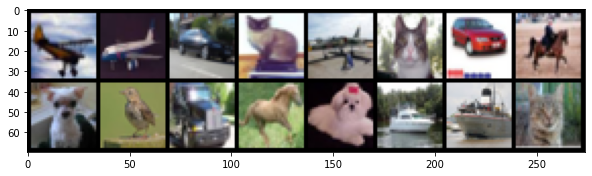

In [ ]:
def imshow(img):
    img = img #/ 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(10,10))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

# show images
imshow(torchvision.utils.make_grid(images))

### Define Model
Refer ``` torch.nn ``` [link](https://pytorch.org/docs/stable/nn.html) 

Experiment with different architectures of encoder and decoder i.e
- encoder and decoder is fully connected layers
- encoder and decoder is combination of convolution layers + fully connected layers
- encoder and decoder is fully convolutional layers.

# **Fully Convolutional layers**

In [ ]:
class FC_Autoencoder(nn.Module):
    def __init__(self):
        super(FC_Autoencoder, self).__init__()
        # Input size: [batch, 3, 32, 32]
        # Output size: [batch, 3, 32, 32]
        self.encoder = nn.Sequential(
            # Write your code here
            
            # nn.Conv2d(3, 12, 4, stride=2, padding=1),
            nn.Conv2d(3, 16, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(16, 4, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
        )
        self.decoder = nn.Sequential(
            # Write your code here
            # nn.ConvTranspose2d(12, 3, 4, stride=2, padding=1),
            nn.ConvTranspose2d(4, 16, 2, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 3, 2, stride=2),
            nn.Sigmoid(),
        )
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded


In [ ]:
def print_model(encoder, decoder):
    print("############## Encoder ##############")
    print(encoder)
    print("############## Decoder ##############")
    print(decoder)
    print("")

def create_model():
  autoencoder = FC_Autoencoder()
  print_model(autoencoder.encoder, autoencoder.decoder)
  # if torch.cuda.is_available():
  #       autoencoder = autoencoder.cuda()
  #       print("Model moved to GPU in order to speed up training.")
  return autoencoder

### Loss and Optimizer

In [ ]:
autoencoder = create_model()
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters())

############## Encoder ##############
Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(16, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)
############## Decoder ##############
Sequential(
  (0): ConvTranspose2d(4, 16, kernel_size=(2, 2), stride=(2, 2))
  (1): ReLU()
  (2): ConvTranspose2d(16, 3, kernel_size=(2, 2), stride=(2, 2))
  (3): Sigmoid()
)



### Training

In [ ]:
for epoch in range(10):
	running_loss = 0.0
	for i, (inputs, _) in enumerate(trainloader, 0):
			inputs = Variable(inputs)
	
			# ============ Forward ============
			encoded, outputs = autoencoder(inputs)
			loss = criterion(outputs, inputs)
			# ============ Backward ============
			optimizer.zero_grad()
			loss.backward()
			optimizer.step()
	
			# ============ Logging ============
			running_loss += loss.data
			if i % 2000 == 1999:
				# print('output - shape', outputs.shape)
				print('[%d, %5d] loss: %.3f' %
					(epoch + 1, i + 1, running_loss / 2000))
				running_loss = 0.0
	
print('Finished Training')
print('Saving Model...')
torch.save(autoencoder.state_dict(), "autoencoder1.pt")

[1,  2000] loss: 0.015
[2,  2000] loss: 0.008
[3,  2000] loss: 0.008
[4,  2000] loss: 0.008
[5,  2000] loss: 0.007
[6,  2000] loss: 0.007
[7,  2000] loss: 0.007
[8,  2000] loss: 0.007
[9,  2000] loss: 0.007
[10,  2000] loss: 0.007
Finished Training
Saving Model...


### Load the saved model and Reconstruct the image

In [ ]:
autoencoder.load_state_dict(torch.load("/content/autoencoder1.pt"))

<All keys matched successfully>

#### Provide Qualitative Results and Aanlysis with different encoder and decoder architectures as mentioned above.

GroundTruth:    cat  ship  ship plane  frog


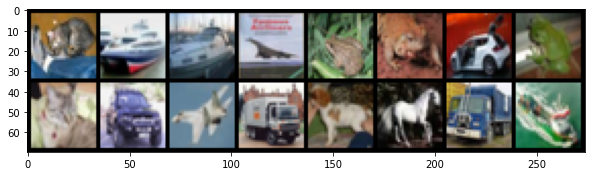

Reconstructed image


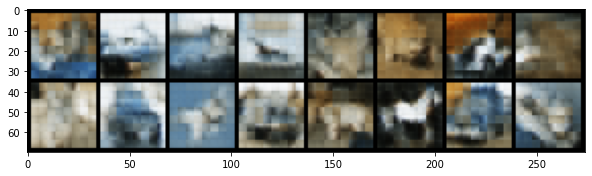

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(5)))
imshow(torchvision.utils.make_grid(images))

images = Variable(images)

print("Reconstructed image")
decoded_imgs = autoencoder(images)[1]
imshow(torchvision.utils.make_grid(decoded_imgs.data))

# **Combination of fully connected and convolutional**

In [ ]:
class FCAC_Autoencoder(nn.Module):
    def __init__(self):
        super(FCAC_Autoencoder, self).__init__()
        # Input size: [batch, 3, 32, 32]
        # Output size: [batch, 3, 32, 32]
        self.encoder = nn.Sequential(
            # Write your code here
            
            # nn.Conv2d(3, 12, 4, stride=2, padding=1),
            nn.Conv2d(3, 16, 3, padding='same'),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            # nn.Conv2d(3, 16, 3, padding=1),
            # nn.ReLU(),
            # nn.MaxPool2d(2, 2),
            nn.Flatten(1),
            
        )
        self.decoder = nn.Sequential(
            # Write your code here
            # nn.ConvTranspose2d(12, 3, 4, stride=2, padding=1),
            # nn.ConvTranspose2d(4, 16, 2, stride=2),
            # nn.ReLU(),
            # nn.ConvTranspose2d(16, 3, 2, stride=2),
            # nn.Sigmoid(),
            nn.Linear(4096, 3*32*32),
            nn.ReLU(),
            # nn.Linear(80, 10),
            nn.Unflatten(1, (3, 32, 32))
        )
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded


In [ ]:
def print_model(encoder, decoder):
    print("############## Encoder ##############")
    print(encoder)
    print("############## Decoder ##############")
    print(decoder)
    print("")

def create_model():
  autoencoder = FCAC_Autoencoder()
  print_model(autoencoder.encoder, autoencoder.decoder)
  # if torch.cuda.is_available():
  #       autoencoder = autoencoder.cuda()
  #       print("Model moved to GPU in order to speed up training.")
  return autoencoder

### Loss and Optimizer

In [ ]:
autoencoder = create_model()
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters())

############## Encoder ##############
Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Flatten(start_dim=1, end_dim=-1)
)
############## Decoder ##############
Sequential(
  (0): Linear(in_features=4096, out_features=3072, bias=True)
  (1): ReLU()
  (2): Unflatten(dim=1, unflattened_size=(3, 32, 32))
)



In [ ]:
inputs.shape

torch.Size([16, 3, 32, 32])

### Training

In [ ]:
for epoch in range(10):
	running_loss = 0.0
	for i, (inputs, _) in enumerate(trainloader, 0):
			inputs = Variable(inputs)
	
			# ============ Forward ============
			encoded, outputs = autoencoder(inputs)
			loss = criterion(outputs, inputs)
			# ============ Backward ============
			optimizer.zero_grad()
			loss.backward()
			optimizer.step()
	
			# ============ Logging ============
			running_loss += loss.data
			if i % 2000 == 1999:
				print('output shape -', outputs.shape)
				print('[%d, %5d] loss: %.3f' %
					(epoch + 1, i + 1, running_loss / 2000))
				running_loss = 0.0
	
print('Finished Training')
print('Saving Model...')
torch.save(autoencoder.state_dict(), "autoencoder2.pt")

output shape - torch.Size([16, 3, 32, 32])
[1,  2000] loss: 0.018
output shape - torch.Size([16, 3, 32, 32])
[2,  2000] loss: 0.011
output shape - torch.Size([16, 3, 32, 32])
[3,  2000] loss: 0.011
output shape - torch.Size([16, 3, 32, 32])
[4,  2000] loss: 0.010
output shape - torch.Size([16, 3, 32, 32])
[5,  2000] loss: 0.010
output shape - torch.Size([16, 3, 32, 32])
[6,  2000] loss: 0.010
output shape - torch.Size([16, 3, 32, 32])
[7,  2000] loss: 0.010
output shape - torch.Size([16, 3, 32, 32])
[8,  2000] loss: 0.010
output shape - torch.Size([16, 3, 32, 32])
[9,  2000] loss: 0.010
output shape - torch.Size([16, 3, 32, 32])
[10,  2000] loss: 0.009
Finished Training
Saving Model...


### Load the saved model and Reconstruct the image

In [ ]:
autoencoder.load_state_dict(torch.load("/content/autoencoder2.pt"))

<All keys matched successfully>

#### Provide Qualitative Results and Aanlysis with different encoder and decoder architectures as mentioned above.

GroundTruth:    cat  ship  ship plane  frog


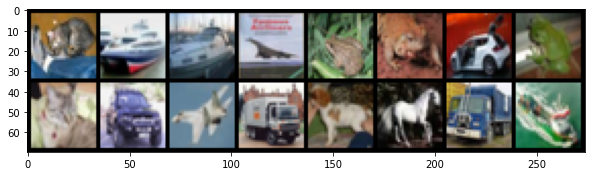

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Reconstructed image


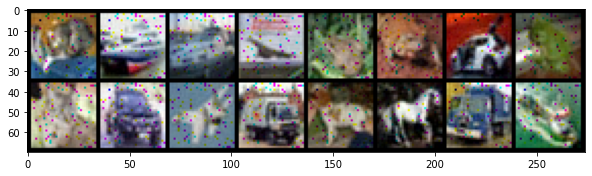

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(5)))
imshow(torchvision.utils.make_grid(images))

images = Variable(images)

print("Reconstructed image")
decoded_imgs = autoencoder(images)[1]
imshow(torchvision.utils.make_grid(decoded_imgs.data))

# **Fully Connected layers**

In [ ]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Input size: [batch, 3, 32, 32]
        # Output size: [batch, 3, 32, 32]
        self.encoder = nn.Sequential(
            # Write your code here
            
            # nn.Conv2d(3, 12, 4, stride=2, padding=1),
            # nn.Conv2d(3, 16, 3, padding=1),
            # nn.ReLU(),
            # nn.MaxPool2d(2, 2),
            # nn.Conv2d(16, 4, 3, padding=1),
            # nn.ReLU(),
            # nn.MaxPool2d(2, 2),
            nn.Flatten(1),
            nn.Linear(3*32*32, 100),
            nn.Tanh()
        )
        self.decoder = nn.Sequential(
            # Write your code here
            # nn.ConvTranspose2d(12, 3, 4, stride=2, padding=1),
            # nn.ConvTranspose2d(4, 16, 2, stride=2),
            # nn.ReLU(),
            # nn.ConvTranspose2d(16, 3, 2, stride=2),
            # nn.Sigmoid(),
            nn.Linear(100, 3*32*32),
            nn.Tanh(),
            nn.Unflatten(1, (3,32,32))
        )
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded


In [ ]:
def print_model(encoder, decoder):
    print("############## Encoder ##############")
    print(encoder)
    print("############## Decoder ##############")
    print(decoder)
    print("")

def create_model():
  autoencoder = Autoencoder()
  print_model(autoencoder.encoder, autoencoder.decoder)
  # if torch.cuda.is_available():
  #       autoencoder = autoencoder.cuda()
  #       print("Model moved to GPU in order to speed up training.")
  return autoencoder

### Loss and Optimizer

In [ ]:
autoencoder = create_model()
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters())

############## Encoder ##############
Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=3072, out_features=100, bias=True)
  (2): Tanh()
)
############## Decoder ##############
Sequential(
  (0): Linear(in_features=100, out_features=3072, bias=True)
  (1): Tanh()
  (2): Unflatten(dim=1, unflattened_size=(3, 32, 32))
)



### Training

In [ ]:
for epoch in range(10):
	running_loss = 0.0
	for i, (inputs, _) in enumerate(trainloader, 0):
			inputs = Variable(inputs)
	
			# ============ Forward ============
			encoded, outputs = autoencoder(inputs)
			loss = criterion(outputs, inputs)
			# ============ Backward ============
			optimizer.zero_grad()
			loss.backward()
			optimizer.step()
	
			# ============ Logging ============
			running_loss += loss.data
			if i % 2000 == 1999:
				print('[%d, %5d] loss: %.3f' %
					(epoch + 1, i + 1, running_loss / 2000))
				running_loss = 0.0
	
print('Finished Training')
print('Saving Model...')
torch.save(autoencoder.state_dict(), "autoencoder3.pt")

[1,  2000] loss: 0.029
[2,  2000] loss: 0.018
[3,  2000] loss: 0.016
[4,  2000] loss: 0.016
[5,  2000] loss: 0.016
[6,  2000] loss: 0.015
[7,  2000] loss: 0.015
[8,  2000] loss: 0.015
[9,  2000] loss: 0.015
[10,  2000] loss: 0.015
Finished Training
Saving Model...


### Load the saved model and Reconstruct the image

In [ ]:
autoencoder.load_state_dict(torch.load("/content/autoencoder3.pt"))

<All keys matched successfully>

#### Provide Qualitative Results and Aanlysis with different encoder and decoder architectures as mentioned above.

GroundTruth:    cat  ship  ship plane  frog


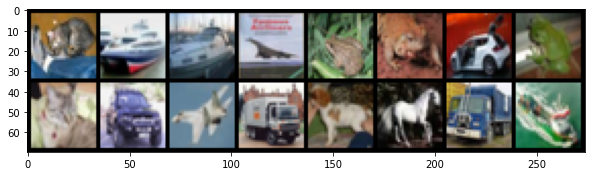

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Reconstructed image


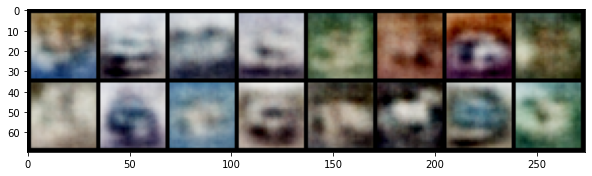

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(5)))
imshow(torchvision.utils.make_grid(images))

images = Variable(images)

print("Reconstructed image")
decoded_imgs = autoencoder(images)[1]
imshow(torchvision.utils.make_grid(decoded_imgs.data))

#### 2.1 What are the Applications of Autoencoders and different types of Autoencoders

Some of the common applications of auto-encoders are:
1. Dimentionality Reduction
2. Feature Extraction
3. Image compression
4. Image Denoising
5. Image Upscaling
6. Image Generation

Types of auto-encoders:
1. Denoising autoencoder
2. Sparse Autoencoder
3. Deep Autoencoder
4. Contractive Autoencoder
5. Undercomplete Autoencoder
6. Convolutional Autoencoder
7. Variational Autoencoder


####2.2 PCA versus Autoencoders. Give detailed differences between them. (can use equations in latex and figures for the justification).

# PCA
<hr>
In PCA the data points are projected to a smaller dimentional hyperplane. The compenents are selected such that they contribute to the majority of variance in the dataset.

### Pros
`+` PCA is generally faster than Autoencoders

### Cons
`-` It is a linear transformation 


<hr>

# Autoencoders
Autoencoders are neural networks that has a middle layer which is generally of smaller size than the input. 
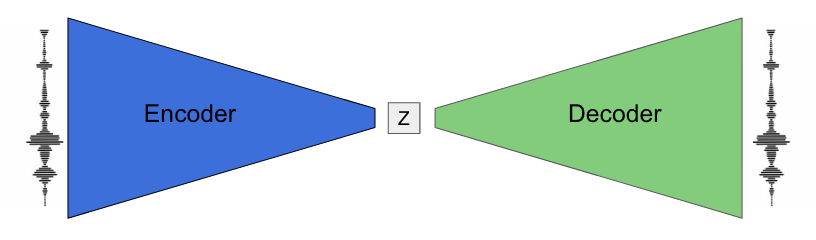

The middle layer learns the features that are essential for reconstruction of the input data.

### Pros
`+` It can learn non-linear transformations
### Cons
`-` Requires complex models and training the model<br>
`-` Requires efforts to make models that don't overfit, as the data is high dimentional


# When to use PCA?
<hr>
PCA can be used when we need fast results and the features have no non-linear relationships

# When to use Autoencoders?
<hr>
If the features have non-linear relationships, then autoencoders compress the input more easily than PCA


### Choosing between PCA and AE comes down to the "Computational resource Vs. Compression power" tradeoff
